<a href="https://colab.research.google.com/github/NaouresBzeouich/projet_traitement_d-image/blob/main/exploringData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Processing of Multispectral Data Project -  A Study on Indian Pines And Pavia University


## Groupe:
-  Naoures Bzeouich
- Omar Mejdi
- Mohamed Aziz Balti
- Ghassen Cherif
- Ahmed Silini


## installaton du  données :

In [ ]:
!pip install --quiet gdown

Indian_pines_corrected_id = '1qKiIK-ZZsb8-6LXJisVu-OGb5sqqJ9nK'
!gdown https://drive.google.com/uc?id={Indian_pines_corrected_id}

Indian_pines_id = '1U1GgOfIheD8ZjkY87x7MqV2ow4kw2kIi'
!gdown https://drive.google.com/uc?id={Indian_pines_id}

Indian_pines_gt_id= '1o2vUv8gs3z7k11SE7hjPiL1EoldFrzLD'
!gdown https://drive.google.com/uc?id={Indian_pines_gt_id}

pavia_U_gt_id = '1MHPc5ztgljCHhRh6ZBF2Tui85LaC0-NL'
!gdown https://drive.google.com/uc?id={pavia_U_gt_id}

pavia_U_id= '159g6cecio9v0tDRPIahcYvJVHaMaOBBY'
!gdown https://drive.google.com/uc?id={pavia_U_id}

Downloading...
From (original): https://drive.google.com/uc?id=1qKiIK-ZZsb8-6LXJisVu-OGb5sqqJ9nK
From (redirected): https://drive.google.com/uc?id=1qKiIK-ZZsb8-6LXJisVu-OGb5sqqJ9nK&confirm=t&uuid=9127982f-adc0-4c4c-8393-a1657c686067
To: /content/Indian_pines_corrected.mat
100% 5.95M/5.95M [00:00<00:00, 42.0MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1U1GgOfIheD8ZjkY87x7MqV2ow4kw2kIi
From (redirected): https://drive.google.com/uc?id=1U1GgOfIheD8ZjkY87x7MqV2ow4kw2kIi&confirm=t&uuid=54b3f0e4-3aa9-4326-a502-439aafad0822
To: /content/Indian_pines.mat
100% 6.30M/6.30M [00:00<00:00, 37.0MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1o2vUv8gs3z7k11SE7hjPiL1EoldFrzLD
From (redirected): https://drive.google.com/uc?id=1o2vUv8gs3z7k11SE7hjPiL1EoldFrzLD&confirm=t&uuid=1a77a18f-9599-463d-9412-a0fd13937549
To: /content/Indian_pines_gt.mat
100% 1.12k/1.12k [00:00<00:00, 3.82MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1MHPc5ztgljC

charger les fichier :

In [ ]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA


In [ ]:


  indian_pines = sio.loadmat('Indian_pines.mat')['indian_pines']
  indian_pines_corrected = sio.loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']
  indian_pines_gt = sio.loadmat('Indian_pines_gt.mat')['indian_pines_gt']

  # pavia_gt = sio.loadmat('Pavia_gt.mat')['pavia_gt']
  # pavia = sio.loadmat('Pavia.mat')['pavia']
  paviaU = sio.loadmat('PaviaU.mat')['paviaU']
  paviaU_gt = sio.loadmat('PaviaU_gt.mat')['paviaU_gt']





# 2. Exploration et PCA sur les données hyperspectrales :

Le travail à valider dans cette partie :

-  1 Explorer les données hyperspectrales : Pavia University et Indian Pines
-  Décrire les données et les visualiser
-  Appliquer une Analyse en composante principale (ACP)
-  Analyser les résultats de l’ACP

## 2.1 Explorer les données hyperspectrales:

### 2.1.1 Analyse statistique des images

In [ ]:
def print_image_info(image, image_name):
    print(f"Info for {image_name}:")
    print(f"Shape: {image.shape}")
    print(f"Data type: {image.dtype}")
    print(f"Min value: {np.min(image)}")
    print(f"Max value: {np.max(image)}")
    print(f"Mean value: {np.mean(image)}")
    print(f"Standard deviation: {np.std(image)}")
    print("-" * 50)


decirer les données :

In [ ]:
print_image_info(indian_pines, "indian_pines")
print_image_info(indian_pines_gt, "indian_pines_gt")

# print_image_info(pavia, "pavia")
# print_image_info(pavia_gt, "pavia_gt")
print_image_info(paviaU, "paviaU")
print_image_info(paviaU_gt, "paviaU_gt")

Info for indian_pines:
Shape: (145, 145, 220)
Data type: uint16
Min value: 955
Max value: 9604
Mean value: 2503.4383253702304
Standard deviation: 1589.6289715739517
--------------------------------------------------
Info for indian_pines_gt:
Shape: (145, 145)
Data type: uint8
Min value: 0
Max value: 16
Mean value: 4.224922711058264
Standard deviation: 5.281846236595187
--------------------------------------------------
Info for paviaU:
Shape: (610, 340, 103)
Data type: uint16
Min value: 0
Max value: 8000
Mean value: 1389.1253099399873
Standard deviation: 897.6575399774091
--------------------------------------------------
Info for paviaU_gt:
Shape: (610, 340)
Data type: uint8
Min value: 0
Max value: 9
Mean value: 0.7071841851494696
Standard deviation: 1.753372965966647
--------------------------------------------------


## 2.2 Visualisation des données:

### 2.2.1 Normalisation des valeurs

In [ ]:
# Normaliser les bandes pour affichage
def normalize_band(band):
    band = band.astype(np.float32)
    return cv2.normalize(band, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

### 2.2.2 Visualisation initiale en niveaux de gris :

In [ ]:
def visualize_gray(image, band_index):
    band = normalize_band(image[:, :, band_index])

    plt.figure(figsize=(6,6))
    plt.imshow(band, cmap='gray')
    plt.title(f"Image en niveaux de gris (bande {band_index})")
    plt.axis('off')
    plt.show()


 visualisation en gris dan le spetre rouge 


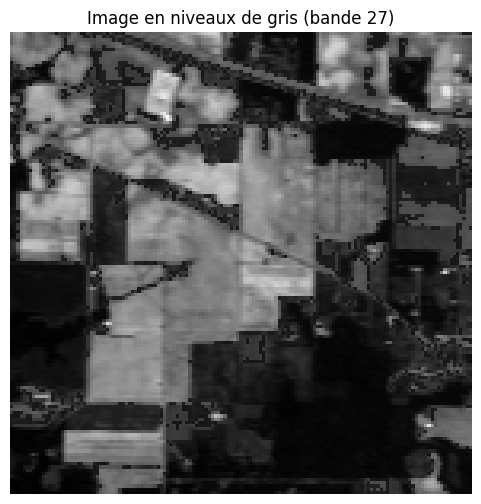

 visualisation en gris dan le spetre vert 


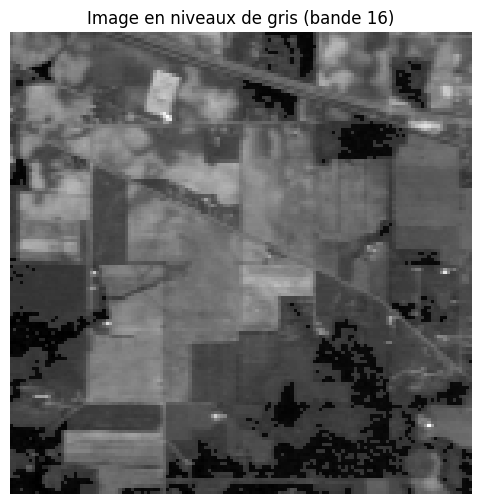

 visualisation en gris dan le spetre bleu 


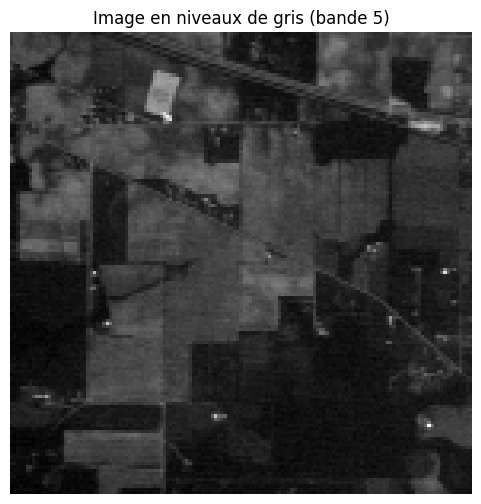

In [ ]:
# Bands 27 (Red), 16 (Green), 5 (Blue)
print( " visualisation en gris dan le spetre rouge ")
visualize_gray(indian_pines, 27)
print( " visualisation en gris dan le spetre vert ")
visualize_gray(indian_pines, 16)
print( " visualisation en gris dan le spetre bleu ")
visualize_gray(indian_pines, 5)

 visualisation en gris dan le spetre rouge 


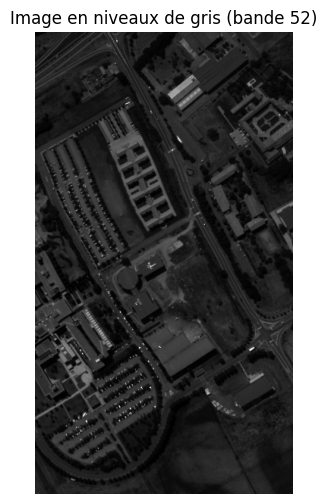

 visualisation en gris dan le spetre vert 


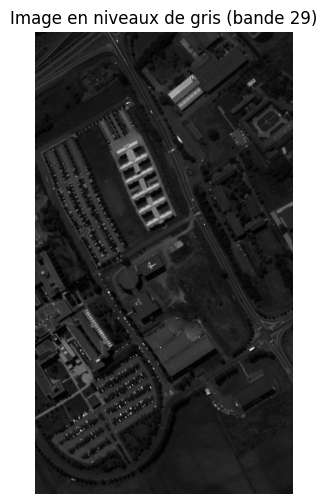

 visualisation en gris dan le spetre bleu 


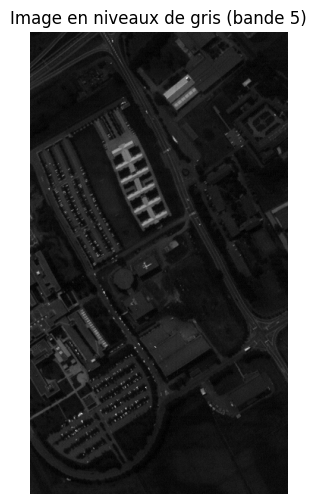

In [ ]:
# Bands 52 (Red), 29 (Green), 5 (Blue)
print( " visualisation en gris dan le spetre rouge ")
visualize_gray(paviaU, 52)
print( " visualisation en gris dan le spetre vert ")
visualize_gray(paviaU, 29)
print( " visualisation en gris dan le spetre bleu ")
visualize_gray(paviaU, 5)

### 2.2.2 Visualiser une fausse image RGB :

In [ ]:
def visualize(image,red_channel,green_channel,blue_channel):
    band_r = normalize_band(image[:, :, red_channel])
    band_g = normalize_band(image[:, :, green_channel])
    band_b = normalize_band(image[:, :, blue_channel])

    rgb_image = cv2.merge([band_r, band_g, band_b])

    plt.figure(figsize=(6,6))
    plt.imshow(rgb_image)
    plt.title(f"Image RGB simulée (bandes {red_channel}-{green_channel}-{blue_channel})")
    plt.axis('off')
    plt.show()


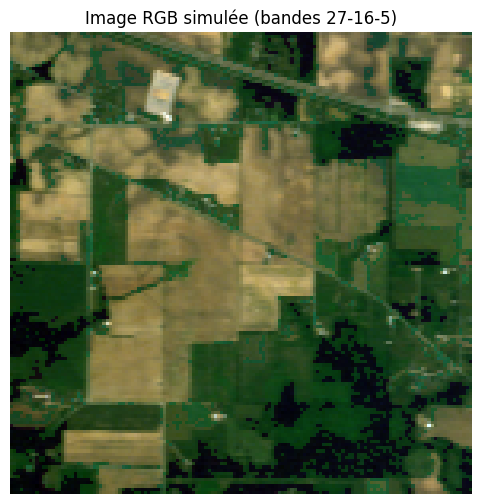

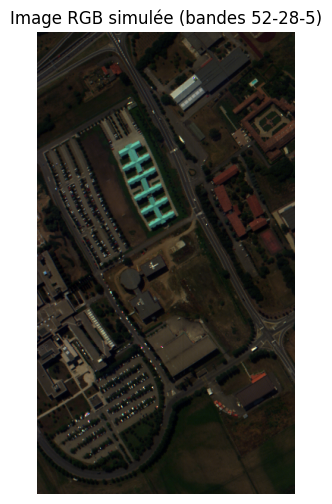

In [ ]:
visualize(indian_pines, 27,16, 5)  # Bands 60 (Red), 30 (Green), 10 (Blue)

# PaviaU
visualize(paviaU, 52, 28, 5)  # Ba60 (Red), 30 (Green), 10 (Blue)


### 2.2.3 Visualisation de Ground Truth :

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

def show_ground_truth(ground_truth, title="Ground Truth Image"):
    # Normalize the ground truth image to display
    normalized_gt = cv2.normalize(ground_truth.astype(np.float32), None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Define the colormap (tab20b is good for discrete categories)
    cmap = plt.get_cmap('tab20', 16)  # We are assuming 16 classes

    # Create the plot
    plt.figure(figsize=(6, 6))
    im = plt.imshow(normalized_gt, cmap=cmap)  # Display the image with the custom colormap
    plt.title(title)
    plt.axis('off')

    # Create a horizontal colorbar with labels
    cbar = plt.colorbar(im, orientation='horizontal', ticks=np.arange(0, 16))  # 16 discrete classes
    cbar.set_ticks(np.linspace(0, 15, 16))  # Ensure ticks are spread across the entire colorbar
    cbar.set_ticklabels([str(i + 1) for i in range(16)])  # Labels from 1 to 16

    # Adjust the colorbar ticks and label positions to avoid overlap
    cbar.ax.tick_params(labelsize=8)  # Smaller font size
    cbar.ax.tick_params(axis='x', pad=10)  # Adjusts the horizontal spacing between ticks and labels

    # Adjust colorbar position to avoid overlapping
    plt.subplots_adjust(bottom=0.15)  # Shift the colorbar slightly downwards if needed

    # Show the image
    plt.show()


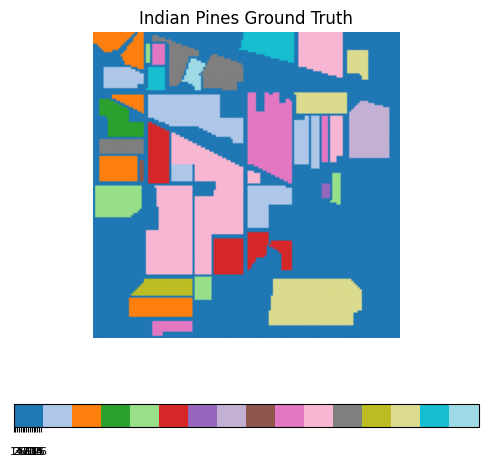

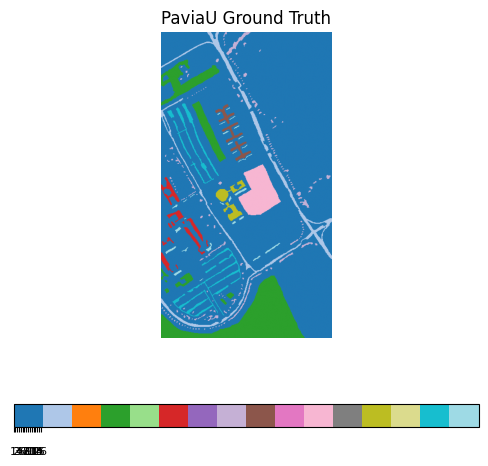

In [ ]:
show_ground_truth(indian_pines_gt, title="Indian Pines Ground Truth")

show_ground_truth(paviaU_gt, title="PaviaU Ground Truth")


### 2.2.4 Visualisation ciblée de caractéristiques spectrales spécifiques :

 showing vegetation :


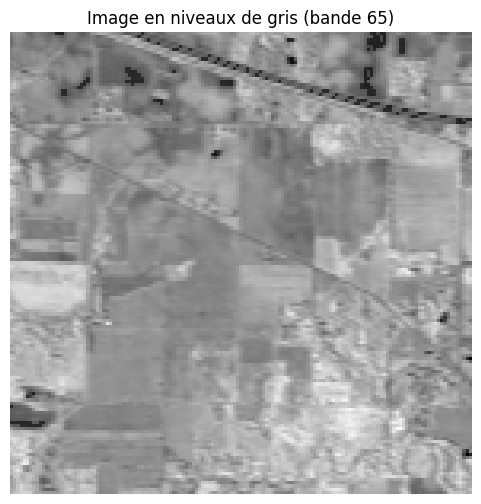

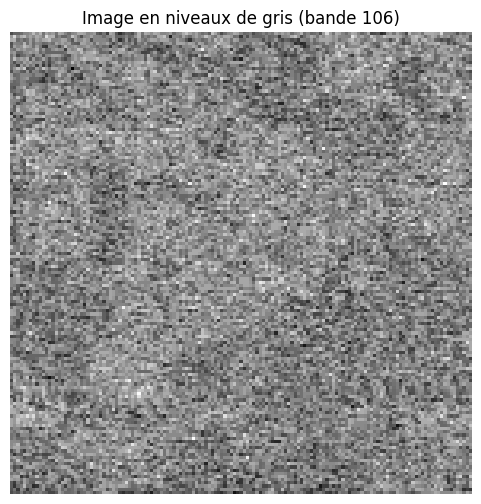

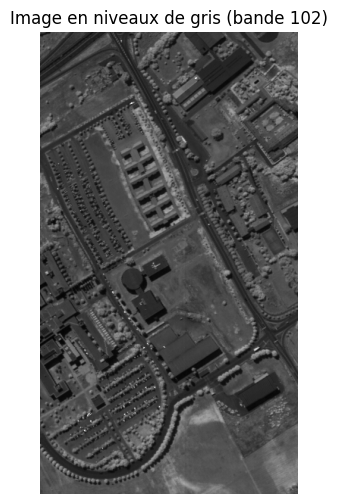

In [ ]:
print(" showing vegetation :")
visualize_gray(indian_pines,65)
# showing water
visualize_gray(indian_pines,106)

# pavia u showing vegetations
visualize_gray(paviaU,102)

## 2.3 Appliquer l'Analyse en Composantes Principales (ACP):

### definitions des fonctions necessaire pour PCA :

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

def compute_pca_components(image, n_components=5):
    # Reshape to (num_pixels, num_bands)
    reshaped_img = image.reshape(-1, image.shape[2])

    # Apply PCA
    pca = PCA(n_components=n_components)
    transformed = pca.fit_transform(reshaped_img)

    # Reshape back to (H, W, n_components)
    pca_image = transformed.reshape(image.shape[0], image.shape[1], n_components)

    return pca_image, pca


In [ ]:
def describe_pca(pca, name="PCA"):
    print("-" * 40)
    print(f"PCA Information: {name}")

    # Explained variance
    print(f"Explained variance: {pca.explained_variance_}")

    # Explained variance ratio
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

    # Cumulative explained variance
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    print(f"Cumulative explained variance: {cumulative_variance}")

    # Eigenvalues (same as explained variance in PCA)
    print(f"Eigenvalues: {pca.explained_variance_}")


In [ ]:
import matplotlib.pyplot as plt

def plot_pca_variance(pca, n_components=5):
    explained_var = pca.explained_variance_ratio_[:n_components]
    cumulative_var = np.cumsum(explained_var)

    plt.figure(figsize=(6, 4))
    plt.plot(range(1, n_components + 1), cumulative_var, marker='o', linestyle='-')
    plt.xlabel('Nombre de composantes principales')
    plt.ylabel('Variance expliquée cumulée')
    plt.title("Variance expliquée par l'ACP")
    plt.grid(True)
    plt.ylim(0.5, 1.05)
    plt.show()


In [ ]:
import cv2

def show_pca_components(pca_image, max_components=5):
    for i in range(min(max_components, pca_image.shape[2])):
        component = pca_image[:, :, i]
        component_norm = cv2.normalize(component, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

        plt.figure(figsize=(4, 4))
        plt.imshow(component_norm, cmap='gray')
        plt.title(f'Composante principale {i + 1}')
        plt.axis('off')
        plt.show()


### 2.3.2 Application du PCA sur les données:

Indian Pines PCA :

In [ ]:
pca_result_ip, pca_model_ip = compute_pca_components(indian_pines_corrected, n_components=20)
describe_pca(pca_model_ip, name='Variance cumulée - Indian Pines')
plot_pca_variance(pca_model_ip,n_components=20 )


Pavia University PCA :

In [ ]:
pca_result_pv, pca_model_pv = compute_pca_components(paviaU, n_components=5)
describe_pca(pca_model_pv, name='Variance cumulée - Pavia University')
plot_pca_variance(pca_model_pv)

### 2.3.2 Visualisation des composants du PCA en gris:

In [ ]:
show_pca_components(pca_result_ip, max_components=20)

# Visualize components for Pavia University
show_pca_components(pca_result_pv)
